In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import numpy as np

import random
import math
import time
import pandas as pd
import scipy.io


In [2]:
# import scipy.io
# data1 = scipy.io.loadmat('data/user1-100.mat')
# data2 = scipy.io.loadmat('data/user101-150.mat')
# data3 = scipy.io.loadmat('data/user151-200.mat')
# tariff = scipy.io.loadmat('data/Tariff2(1).mat')["Tariff"][0].tolist()
# ZP = data1["ZP"].sum(axis=1) + data2["ZP"].sum(axis=1) + data3["ZP"].sum(axis=1)
# ZP1 = np.concatenate((data1["ZP"], data2["ZP"][:, 100:], data3["ZP"][:, 150:]), axis=1).T
# ZT = np.concatenate((data1["ZTtank"], data2["ZTtank"][:, 100:], data3["ZTtank"][:, 150:]), axis=1).T
# pattern = pd.read_csv('data/0519 2000userpattern.csv')
# pattern200 = np.array(pattern)[:200, 1:]

In [4]:
df=pd.read_csv('data/0728 200user.csv')

In [4]:
# df.head()

,p_norm,p_flex,ls,tariff,ls_move
0,296.10,303.90,1,0.288,0.0
1,274.66,325.34,1,0.288,1.0
2,311.65,288.35,1,0.288,1.0
3,314.81,285.19,1,0.288,1.0
4,304.68,0.00,1,0.288,1.0


In [57]:
# #生成测试数据
# test=df[['p_norm','tariff']]
# scaler = MinMaxScaler(feature_range=(0, 1))
# x_test=scaler.fit_transform(test[96*243-96*2:96*243-96*1])
# real_test=df[['p_norm']][96*243-96*1:]

In [5]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [5]:
#生成up和down不同的96组信号

# down = []
# for i in range(96):
#     row = []
#     for j in range(96):
#         if j < i:
#             row.append(0)
#         else:
#             row.append(-1)
#     down.append(row)
# down = np.array(down)

# up = []
# for i in range(96):
#     row = []
#     for j in range(96):
#         if j < i:
#             row.append(0)
#         else:
#             row.append(1)
#     up.append(row)
# up = np.array(up)

In [6]:
# 生成一天的灵活度
# def flexoneday(p_base, t_base, dr_sig, userpattern):
#     p_flex = np.zeros(96 , dtype=int)
#     for i in range(200):
#         flex = np.zeros(96, dtype=int).tolist()
#         temp = t_base[i]
#         p = p_base[i]
#         pattern = userpattern[i]
#         for j in range(96 - 1):
#             if dr_sig[j] == 0:
#                 flex[j] = 0
#             elif dr_sig[j] == -1:
#                 flex[j] = p[j]
#                 p[j] = 0
#                 if pattern[j] == 1 or pattern[j] == 2 or pattern[j] == 5:
#                     temp[j + 1] = temp[j] - 1.142
#                 elif pattern[j] == 3:
#                     temp[j + 1] = temp[j] - 8.14
#                 else:
#                     temp[j + 1] = temp[j] - 15.143
#                 if temp[j] <= 60:
#                     flex[j] = 0  # 温控信号与dr信号对冲，此后灵活度均降为零
#             else:  # 正1信号代表此刻功率变为最大功率
#                 flex[j] = 3 - p[j]
#                 p[j] = 3
#                 if pattern[j] == 1 or pattern[j] == 2 or pattern[j] == 5:
#                     temp[j + 1] = temp[j] + 6.4
#                 elif pattern[j] == 3:
#                     temp[j + 1] = temp[j] - 4.6
#                 else:
#                     temp[j + 1] = temp[j] - 8.6
#                 if temp[j] >= 100:
#                     flex[j] = 0  # 温控信号与dr信号对冲，灵活度降为零
#         p_flex = p_flex + np.array(flex)
#     return p_flex


In [8]:
# ZP1 = np.load('data/ZP1.npy')
# ZP = np.load('data/ZP.npy')
# ZT = np.load('data/ZT.npy')
# pattern200 = np.load('data/0519 2000userpattern.npy')[:200, 1:]
# pattern = pd.read_csv('data/0519 2000userpattern.csv')
# pattern200 = np.array(pattern)[:200, 1:]

In [9]:
# real_flex_up = []
# for i in range(29):
#     flex1 = []
#     for j in range(96):
#         p = ZP1[:, 243*96-96*(29-i) : 243*96-96*(28-i)].copy()# 这一步很关键，否则函数会直接对ZP1进行修改，无法循环
#         t = ZT[:, 243*96-96*(29-i) : 243*96-96*(28-i)].copy()# 同上
#         a = up[j]
#         flex = flexoneday(p, t , a, pattern200[:,243*96-96*(29-i) : 243*96-96*(28-i)]).tolist()
#         flex1.append(flex)
#     real_flex_up.append(flex1)

In [13]:
# real_flex_up = np.array(real_flex_up)
# np.save('data/real_flex_up.npy', real_flex_up)

In [40]:
real_flex_up = np.load('data/real_flex_up.npy')
real_flex_down = np.load('data/real_flex_down.npy')

In [6]:
# real_flex_up.shape

(29, 96, 96)

In [14]:
# real_flex_down = []
# for i in range(29):
#     flex1 = []
#     for j in range(96):
#         p = ZP1[:, 243*96-96*(29-i) : 243*96-96*(28-i)].copy()# 这一步很关键，否则函数会直接对ZP1进行修改，无法循环
#         t = ZT[:, 243*96-96*(29-i) : 243*96-96*(28-i)].copy()# 同上
#         a = down[j]
#         flex = flexoneday(p, t , a, pattern200[:,243*96-96*(29-i) : 243*96-96*(28-i)]).tolist()
#         flex1.append(flex)
#     real_flex_down.append(flex1)
# real_flex_down = np.array(real_flex_down)

In [16]:
# np.save('data/real_flex_down.npy', real_flex_down)

In [23]:
# #根据倒数第二天数据进行序列预测
# #对信号归一化
# scaled_down = np.where(down==0,0.5,0)
# scaled_up = np.where(up==0,0.5,1)
# # test_up =[]
# # for i in range(96):
# #     a=np.hstack((np.array(scaled_up[i]).reshape(96,1),x_test))
# #     test_up.append(a)
# # test_up = np.array(test_up)
# # test_down =[]
# # for i in range(96):
# #     a=np.hstack((np.array(scaled_down[i]).reshape(96,1),x_test))
# #     test_down.append(a)
# # test_down = np.array(test_down)
# scaled_down.shape

(96, 96)

In [29]:
# test_up =[]
# for i in range(29):
#     test = []
#     for j in range(96):
#         a=np.hstack((np.array(scaled_up[j]).reshape(96,1),x_test[i,:,1:]))
#         test.append(a)
#     test_up.append(test)
# test_up = np.array(test_up)

In [31]:
# np.save('data/test_up.npy',test_up)

In [7]:
test_up = np.load('data/test_up.npy')
test_down = np.load('data/test_down.npy')

In [32]:
# test_down =[]
# for i in range(29):
#     test = []
#     for j in range(96):
#         a=np.hstack((np.array(scaled_down[j]).reshape(96,1),x_test[i,:,1:]))
#         test.append(a)
#     test_down.append(test)
# test_down = np.array(test_down)

In [34]:
# np.save('data/test_down.npy',test_down)

In [9]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.nn.utils import weight_norm
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# import spacy
# import numpy as np

# import random
# import math
# import time
# import pandas as pd
# from Dilated_TCN_Model import TemporalConvNet


In [8]:

from keras.models import load_model
model = load_model('models/0801 GRU model.h5')


F:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
# pre_flex.view(1,96).detach().numpy()

In [80]:
# pre_flex_up=[]
# for i in range(96):
#     a = torch.Tensor(test_up[i].reshape(1,96,3))
#     pre_flex = model(a)
#     scaler.fit_transform(df['p_flex'].values.reshape(-1,1))
#     pre_flex = scaler.inverse_transform(pre_flex.view(1,96).detach().numpy())
#     pre_flex_up.append(pre_flex)
# pre_flex_up = np.array(pre_flex_up)


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
pre_flex_up=[]
for i in range(29):
    pre = []
    for j in range(96):
        a = test_up[i,j,:,:].reshape(1,96,3)
        pre_flex = model.predict(a)
        scaler.fit_transform(df['p_flex'].values.reshape(-1,1))
        pre_flex = scaler.inverse_transform(pre_flex.reshape(1,96))
        pre.append(pre_flex)
    pre_flex_up.append(pre)
pre_flex_up = np.array(pre_flex_up)


In [10]:
pre_flex_up = pre_flex_up.reshape(29,96,96)

In [63]:
# pre_flex_up = np.load('results/0801 TCN pre_flex_up.npy')
# real_flex_up = np.load('results/0801 TCN real_flex_up.npy')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
pre_flex_down=[]
for i in range(29):
    pre = []
    for j in range(96):
        a = test_down[i,j,:,:].reshape(1,96,3)
        pre_flex = model.predict(a)
        scaler.fit_transform(df['p_flex'].values.reshape(-1,1))
        pre_flex = scaler.inverse_transform(pre_flex.reshape(1,96))
        pre.append(pre_flex)
    pre_flex_down.append(pre)
pre_flex_down = np.array(pre_flex_down)
pre_flex_down = pre_flex_down.reshape(29,96,96)


In [12]:
np.save('results/0801 GRU pre_flex_down.npy',pre_flex_down)
np.save('results/0801 GRU real_flex_down.npy',real_flex_down)

In [33]:
pre_flex_down = np.load('results/0801 LSTM pre_flex_down.npy')
real_flex_down = np.load('results/0801 LSTM real_flex_down.npy')

In [37]:
pre_flex_down.shape

(29, 96, 96)

In [41]:
a = np.sqrt(np.mean(np.power((pre_flex_down[4,40,:] - real_flex_down[4,40,:]),2)))
a

11.506414424293343

In [41]:
RMSE_UP = []
MAE_UP = []
for i in range(29):
    rmse = np.sqrt(np.mean(np.power((real_flex_up[i] - pre_flex_up[i]),2)))
    mae = np.mean(abs(real_flex_up[i] - pre_flex_up[i]))
    RMSE_UP.append(rmse)
    MAE_UP .append(mae)
RMSE_UP = np.array(RMSE_UP)
MAE_UP = np.array(MAE_UP)

In [42]:
RMSE_down = []
MAE_down = []
for i in range(29):
    rmse = np.sqrt(np.mean(np.power((real_flex_down[i] - pre_flex_down[i]),2)))
    mae = np.mean(abs(real_flex_down[i] - pre_flex_down[i]))
    RMSE_down.append(rmse)
    MAE_down .append(mae)
RMSE_down = np.array(RMSE_down)
MAE_down = np.array(MAE_down)

In [43]:
print("GRU_RMSE_UP:Mean:{:.3f},Max:{:.3f},Min:{:.3f}".format(np.mean(RMSE_UP),np.max(RMSE_UP),np.min(RMSE_UP)))
print("GRU_MAE_UP:Mean:{:.3f},Max:{:.3f},Min:{:.3f}".format(np.mean(MAE_UP),np.max(MAE_UP),np.min(MAE_UP)))
print("GRU_RMSE_down:Mean:{:.3f},Max:{:.3f},Min:{:.3f}".format(np.mean(RMSE_down),np.max(RMSE_down),np.min(RMSE_down)))
print("GRU_MAE_down:Mean:{:.3f},Max:{:.3f},Min:{:.3f}".format(np.mean(MAE_down),np.max(MAE_down),np.min(MAE_down)))

GRU_RMSE_UP:Mean:27.725,Max:31.706,Min:26.595
GRU_MAE_UP:Mean:10.535,Max:11.642,Min:9.938
GRU_RMSE_down:Mean:20.710,Max:23.728,Min:18.757
GRU_MAE_down:Mean:8.027,Max:8.659,Min:7.135


In [27]:
data={'GRU_RMSE_UP':RMSE_UP,'GRU_MAE_UP':MAE_UP,'GRU_RMSE_down':RMSE_down,'GRU_MAE_down':MAE_down}

In [28]:
pd.DataFrame(data).to_csv('0801 GRU metrics.csv')

In [ ]:
rmse_1step = np.sqrt(np.mean(np.power((real_up_1step - pre_up_1step),2)))
mae_1step = np.mean(abs(real_up_1step - pre_up_1step))

In [52]:
real_flex_up1 = real_flex_up[7]
real_flex_down1 = real_flex_down[7]
pre_flex_up1 = pre_flex_up[7]
pre_flex_down1 = pre_flex_down[7]

In [53]:
#生成灵活度表征函数
#上备用
real_up_1step=[]
for i in range(96):
    a=real_flex_up1[i][i]
    real_up_1step.append(a)
real_up_1step=np.array(real_up_1step)

real_up_2step=[]
for i in range(48):
    a=[real_flex_up1[i][i],real_flex_up1[i][i+1]]
    b=np.min(a)
    real_up_2step.append(b)
    real_up_2step.append(b)
real_up_2step=np.array(real_up_2step)

real_up_4step=[]
for i in range(24):
    a=[real_flex_up1[i][i],real_flex_up1[i][i+1],real_flex_up1[i][i+2],real_flex_up1[i][i+3]]
    b=np.min(a)
    real_up_4step.append(b)
    real_up_4step.append(b)
    real_up_4step.append(b)
    real_up_4step.append(b)
real_up_4step=np.array(real_up_4step)
 



In [54]:
pre_up_1step=[]
for i in range(96):
    a=pre_flex_up1[i][i]
    pre_up_1step.append(a)
pre_up_1step=np.array(pre_up_1step)

pre_up_2step=[]
for i in range(48):
    a=[pre_flex_up1[i][i],pre_flex_up1[i][i+1]]
    b=np.min(a)
    pre_up_2step.append(b)
    pre_up_2step.append(b)
pre_up_2step=np.array(pre_up_2step)

pre_up_4step=[]
for i in range(24):
    a=[pre_flex_up1[i][i],pre_flex_up1[i][i+1],pre_flex_up1[i][i+2],pre_flex_up1[i][i+3]]
    b=np.min(a)
    pre_up_4step.append(b)
    pre_up_4step.append(b)
    pre_up_4step.append(b)
    pre_up_4step.append(b)
pre_up_4step=np.array(pre_up_4step)
 



In [55]:
#下备用
real_down_1step=[]
for i in range(96):
    a=real_flex_down1[i][i]
    real_down_1step.append(a)
real_down_1step=np.array(real_down_1step)

real_down_2step=[]
for i in range(48):
    a=[real_flex_down1[i][i],real_flex_down1[i][i+1]]
    b=np.min(a)
    real_down_2step.append(b)
    real_down_2step.append(b)
real_down_2step=np.array(real_down_2step)

real_down_4step=[]
for i in range(24):
    a=[real_flex_down1[i][i],real_flex_down1[i][i+1],real_flex_down1[i][i+2],real_flex_down1[i][i+3]]
    b=np.min(a)
    real_down_4step.append(b)
    real_down_4step.append(b)
    real_down_4step.append(b)
    real_down_4step.append(b)
real_down_4step=np.array(real_down_4step)



In [56]:
pre_down_1step=[]
for i in range(96):
    a=pre_flex_down1[i][i]
    pre_down_1step.append(a)
pre_down_1step=np.array(pre_down_1step)

pre_down_2step=[]
for i in range(48):
    a=[pre_flex_down1[i][i],pre_flex_down1[i][i+1]]
    b=np.min(a)
    pre_down_2step.append(b)
    pre_down_2step.append(b)
pre_down_2step=np.array(pre_down_2step)

pre_down_4step=[]
for i in range(24):
    a=[pre_flex_down1[i][i],pre_flex_down1[i][i+1],pre_flex_down1[i][i+2],pre_flex_down1[i][i+3]]
    b=np.min(a)
    pre_down_4step.append(b)
    pre_down_4step.append(b)
    pre_down_4step.append(b)
    pre_down_4step.append(b)
pre_down_4step=np.array(pre_down_4step)
 


 



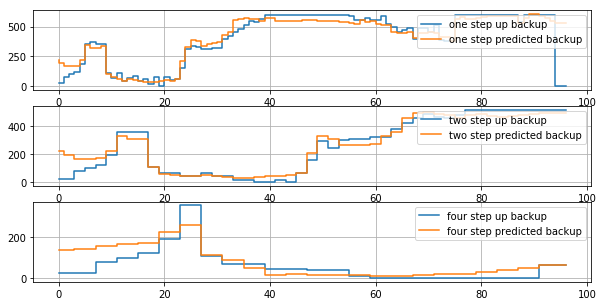

In [57]:
#画图
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311)
x1=np.linspace(0,96,96).astype(int)
l1=plt.step(x1,real_up_1step,label='one step up backup')
l2=plt.step(x1,pre_up_1step,label='one step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()

ax2 = plt.subplot(312)
l1=plt.step(x1,real_up_2step,label='two step up backup')
l2=plt.step(x1,pre_up_2step,label='two step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()

ax3 = plt.subplot(313)
l1=plt.step(x1,real_up_4step,label='four step up backup')
l2=plt.step(x1,pre_up_4step,label='four step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()



plt.show()



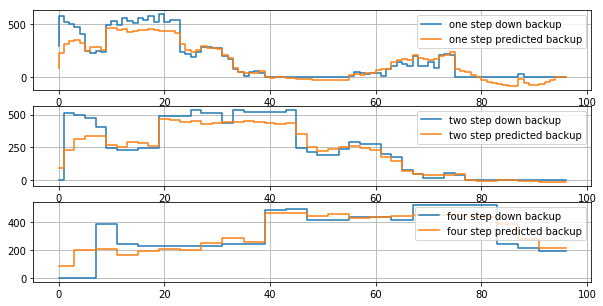

In [58]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311)
x1=np.linspace(0,96,96).astype(int)
l1=plt.step(x1,real_down_1step,label='one step down backup')
l2=plt.step(x1,pre_down_1step,label='one step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()

ax2 = plt.subplot(312)
l1=plt.step(x1,real_down_2step,label='two step down backup')
l2=plt.step(x1,pre_down_2step,label='two step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()

ax3 = plt.subplot(313)
l1=plt.step(x1,real_down_4step,label='four step down backup')
l2=plt.step(x1,pre_down_4step,label='four step predicted backup')
plt.legend(loc = 'upper right')
# plt.yticks(y)
plt.grid()



plt.show()



In [60]:
data = {'GRU_real_up_1step':real_up_1step,'GRU_real_up_2step':real_up_2step,'GRU_real_up_4step':real_up_4step,'GRU_pre_up_1step':pre_up_1step,
       'GRU_pre_up_2step':pre_up_2step,'GRU_pre_up_4step':pre_up_4step,'GRU_real_down_1step':real_down_1step,'GRU_real_down_2step':real_down_2step,
        'GRU_real_down_4step':real_down_4step,'GRU_pre_down_1step':pre_down_1step,'GRU_pre_down_2step':pre_down_2step,'GRU_pre_down_4step':pre_down_4step}
pd.DataFrame(data).to_csv('results/reatodraw_GRU flex 0802.csv')

In [3]:
MAX_EPOCH = 2000
train_loss_plot = np.load('loss/0801 TCN train_loss_plot.npy')
val_loss_plot = np.load('loss/0801 TCN val_loss_plot.npy')
train_loss_plot = np.reshape(train_loss_plot, [MAX_EPOCH, -1])
val_loss_plot = np.reshape(val_loss_plot, [MAX_EPOCH, -1])

In [ ]:
train

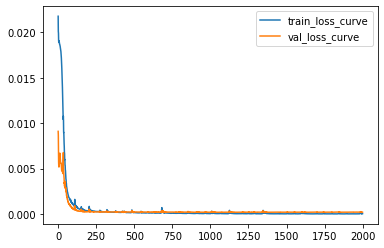

In [4]:
plt.figure()
plt.plot(train_loss_plot)
plt.plot(val_loss_plot)
plt.legend(['train_loss_curve', 'val_loss_curve'])